# Lesson 3 (lecture 4): Plotting

Let’s learn the basics of plotting with pandas to make things more interesting.

for *preliminary* visual exploration of data.

## Dataset 1: glacial data

let's import the data again

In [2]:
import pandas as pd

# read in the file

df = pd.read_csv("glacial_loss.csv")

In [3]:
# see the first 5 rows

df.head()

,year,europe,arctic,alaska,asia,north_america,south_america,antarctica,global_glacial_volume_change,annual_sea_level_rise,cumulative_sea_level_rise
0,1961,-5.128903,-108.382987,-18.721190,-32.350759,-14.359007,-4.739367,-35.116389,-220.823515,0.610010,0.610010
1,1962,5.576282,-173.252450,-24.324790,-4.675440,-2.161842,-13.694367,-78.222887,-514.269862,0.810625,1.420635
2,1963,-10.123105,-0.423751,-2.047567,-3.027298,-27.535881,3.419633,3.765109,-550.575640,0.100292,1.520927
3,1964,-4.508358,20.070148,0.477800,-18.675385,-2.248286,20.732633,14.853096,-519.589859,-0.085596,1.435331
4,1965,10.629385,43.695389,-0.115332,-18.414602,-19.398765,6.862102,22.793484,-473.112003,-0.128392,1.306939


- year: calendar year
- europe - antarctica: change in glacial volume (km3) in each region that year
- global_glacial_volume_change: cumulative global glacial volume change (km3), starting in 1961
- annual_sea_level_rise: annual rise in sea level (mm)
- cumulative_sea_level_rise: cumulative rise in sea level (mm) since 1961

In [5]:
# print the columns

df.columns

Index(['year', 'europe', 'arctic', 'alaska', 'asia', 'north_america',
       'south_america', 'antarctica', 'global_glacial_volume_change',
       'annual_sea_level_rise', 'cumulative_sea_level_rise'],
      dtype='object')

## `plot()` method


A `pandas.DataFrame` has a built-in method plot() for plotting. When we call it without specifying any other parameters `plot()` creates one line plot for each of the columns with numeric data.

Default behavior of plot without specifying the parameters:

- creates one line plot for each of the columns with numeric data
- sets the values of the index as the x-axis calues

<AxesSubplot:>

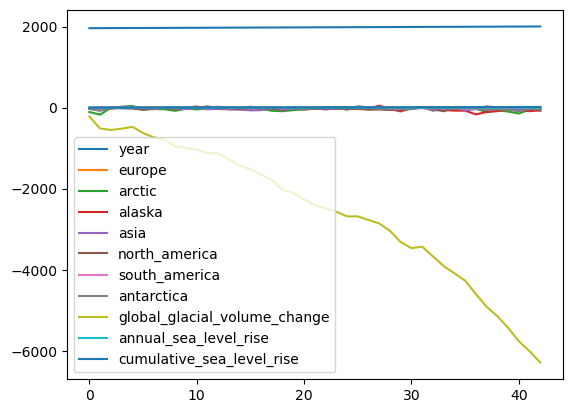

In [6]:
df.plot()

- this is a mess :)
- the default for plot is to use the values of the index as the x-axis values

## Line plots

We can make a line plot of one column against another by using the following syntax:

```
df.plot(x='x_values_column', y='y_values_column')

```

<AxesSubplot:xlabel='year'>

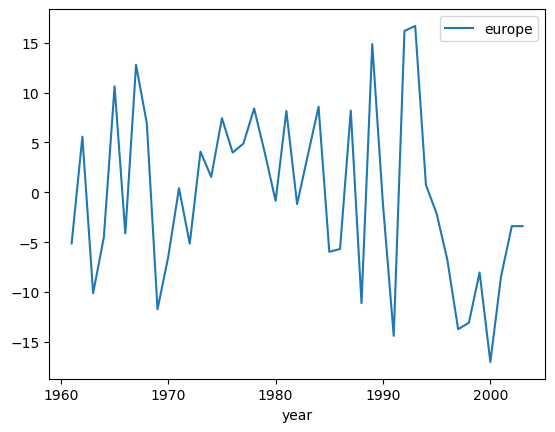

In [7]:
# change in glacial volume per year in Europe
df.plot(x='year', y='europe')

We can do some basic customization specifying other arguments of the `plot` function. 

Some basic ones are:

- `title`: Title to use for the plot.
- `xlabel`: Name to use for the xlabel on x-axis
- `ylabel`: Name to use for the ylabel on y-axis
- `color`: change the color of our plot (and labels of key)

<AxesSubplot:title={'center':'Change in glacial volume per year in Europe'}, xlabel='Year', ylabel='\u200bChange in glacial volume (km3\u200b)'>

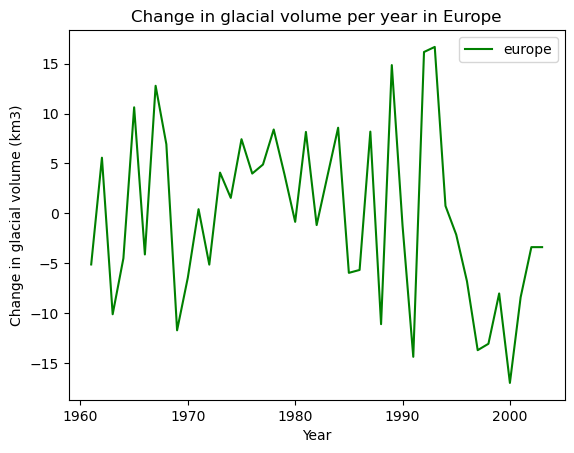

In [9]:
df.plot(x='year', 
        y='europe',
        title='Change in glacial volume per year in Europe',
        xlabel='Year',
        ylabel='​Change in glacial volume (km3​)',
        color='green'
        )

- documentation w optional arguments:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html 


- `color`: specify the color of each column with a dictionary `{'col1':'color1', 'col2':'color2'}`

<AxesSubplot:title={'center':'Change in glacial volume per year in the Arctic & Alaska'}, xlabel='Year', ylabel='Change in glacial volume (km3)'>

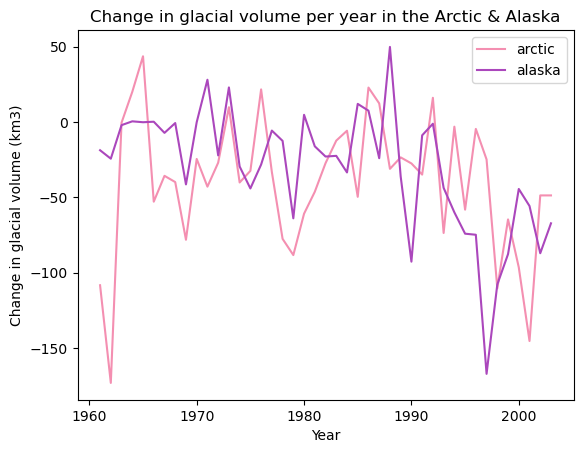

In [11]:
df.plot(x='year', 
        y=['arctic', 'alaska'],
        title='Change in glacial volume per year in the Arctic & Alaska',
        xlabel='Year',
        ylabel='Change in glacial volume (km3)',
        color = {'arctic':'#F48FB1',
                 'alaska': '#AB47BC'
                }
        )

<AxesSubplot:title={'center':'Change in glacial volume per year in the Arctic & Alaska'}, xlabel='Year', ylabel='Change in glacial volume (km3)'>

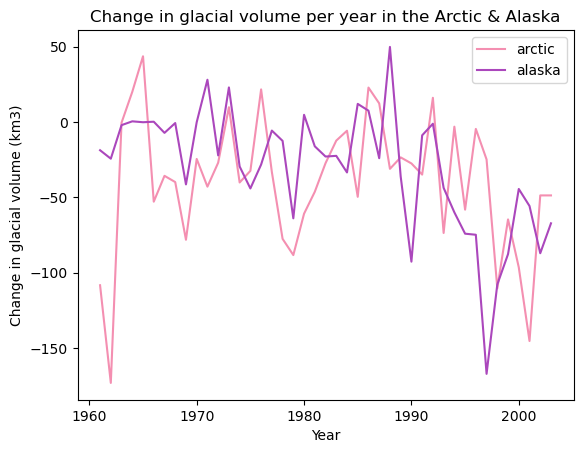

In [12]:
colors = {'arctic':'#F48FB1',
                 'alaska': '#AB47BC'
                }

df.plot(x='year', 
        y=['arctic', 'alaska'],
        title='Change in glacial volume per year in the Arctic & Alaska',
        xlabel='Year',
        ylabel='Change in glacial volume (km3)',
        color = colors
        )

We can also create separate plots for each column by setting the `subplots` argument to `True`.

array([<AxesSubplot:xlabel='Year', ylabel='Change in glacial volume (km3)'>,
       <AxesSubplot:xlabel='Year', ylabel='Change in glacial volume (km3)'>],
      dtype=object)

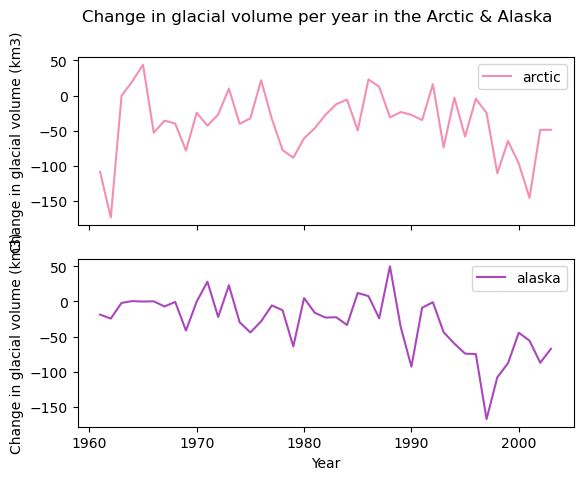

In [13]:
df.plot(x='year', 
        y=['arctic', 'alaska'],
        title='Change in glacial volume per year in the Arctic & Alaska',
        xlabel='Year',
        ylabel='Change in glacial volume (km3)',
        color = colors,
        subplots=True
        )

### Check-in:

1. Plot a graph of the annual sea level rise with respect to the years.

2. What information is the columns variable retrieving from the data frame? Describe in a sentence what is being plotted.

re-worded in lecture:
- in the following code, what information is stored in the columns variable? describe what we are plotting:


In [26]:
df.loc[:,'europe':'antarctica'].columns

Index(['europe', 'arctic', 'alaska', 'asia', 'north_america', 'south_america',
       'antarctica'],
      dtype='object')

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

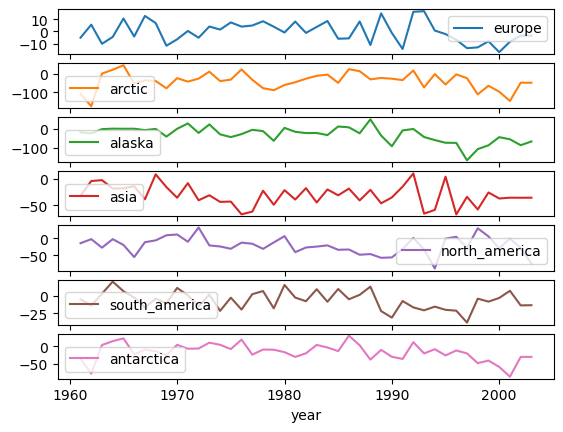

In [27]:
# selecting all of the rows for the columns europe-through-antarctica
columns = df.loc[:,'europe':'antarctica'].columns # returns a list of column names
df.plot(x='year', 
        y=columns, 
        subplots=True)

<AxesSubplot:title={'center':'Annual sea level rise'}, xlabel='Year'>

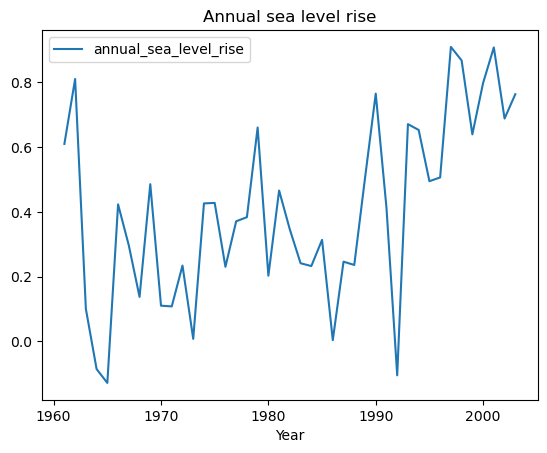

In [28]:
# anual sea level rise with respect to years

df.plot(x='year', 
        y='annual_sea_level_rise',
        title='Annual sea level rise',
        xlabel='Year'
        #,
       # ylabel='Change in glacial volume (km3)',
     #   color = {'annual_sea_level_rise': '#AB47BC'}
       # subplots=True
        )


## Palmer penguins dataset


The data is usually accessed through the palmerpenguins R data package. There is no similar access to the Palmer penguins data through Python (yet!), so we will read the raw csv directly into Python using the URL:

https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv

- also a bit.ly: https://bit.ly/palmer-penguins-csv

The Palmer penguins dataset has the following columns:

- species
- island
- bill_length_mm
- bill_depth_mm
- flipper_lenght_mm
- body_mass_g
- sex
- year





In [32]:
# read in data
penguins = pd.read_csv('https://bit.ly/palmer-penguins-csv')



# look at dataframe's head
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [33]:
# check column data types and # of non NA values in each column
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [34]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


We can also subset the dataframe to get information about a particular column or groups of columns.

In [39]:
# get count unique values in categorical data columns and year

penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [37]:
# get unique values in species column
print(penguins.species.unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [38]:
# unique species value counts

print(penguins.species.value_counts())

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


## `kind` argument in `plot()`

We talked about how the `plot()` function creates by default a line plot. The parameter that controls this behaviour is `plot()`’s `kind` parameter. By changing the value of `kind` we can create different kinds of plots. Let’s look at the documentation to see what these values are:

check: 
`pandas.DataFrame.plot` documentation


the default value of `kind` is `'line'`

Let’s change the `kind` parameter to create some different plots.


## Scatter plots

Suppose we want to visualy compare the flipper length against the body mass, we can do this with a scatterplot.


Example:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

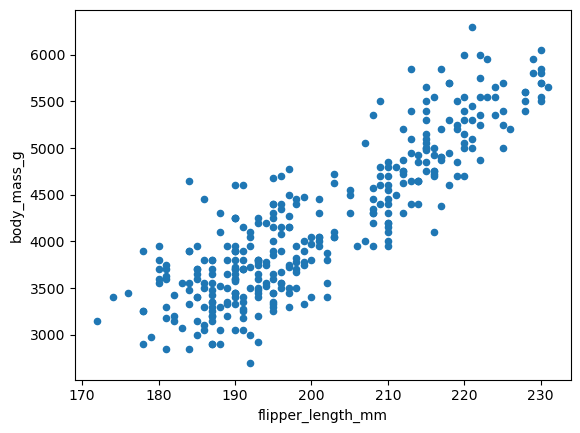

In [41]:
penguins.plot(kind='scatter', # scatterplot
        x='flipper_length_mm', 
        y='body_mass_g')

<AxesSubplot:title={'center':'Flipper length and body mass for Palmer penguins'}, xlabel='Flipper length (mm)', ylabel='Body mass (g)'>

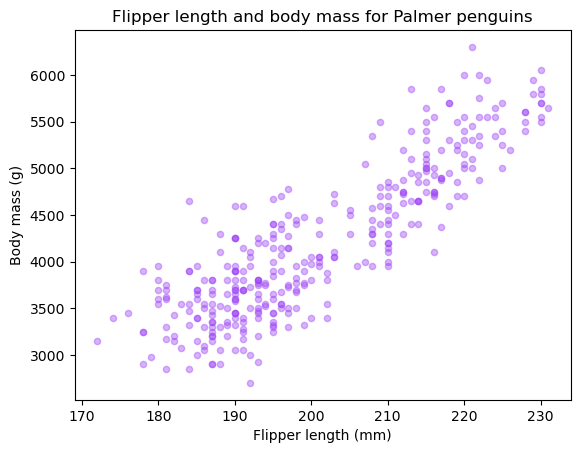

In [45]:
#customization:

penguins.plot(kind='scatter',
        x='flipper_length_mm', 
        y='body_mass_g',
        title='Flipper length and body mass for Palmer penguins',
        xlabel='Flipper length (mm)',
        ylabel='Body mass (g)',
        color='#9c42f5',
        alpha=0.4         # transparency
             )

## Bar plots


We can create bar plots of our data setting `kind='bar`' in the `plot()` method.


For example, let’s say we want to get data about the 10 penguins with lowest body mass. We can first select this data using the `nsmallest()` method for series:

(note: also `nlargest`, which is relevant in HW1 task 4 !)

In [47]:
penguins.body_mass_g.nsmallest(10)

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

In [55]:
type(penguins.body_mass_g.nsmallest(10).sort_values())

pandas.core.series.Series

In [57]:
type(penguins.body_mass_g.nsmallest(10).sort_values)

method

In [49]:
penguins.body_mass_g.nsmallest(10).sort_values() # default ascending=True

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

In [50]:
smallest = penguins.body_mass_g.nsmallest(10).sort_values()
smallest

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

<AxesSubplot:>

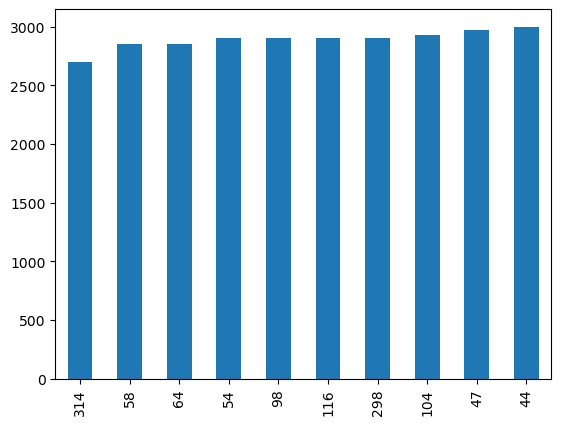

In [51]:
smallest.plot(kind='bar')


If we wanted to look at other data for these smallest penguins we can use the index of the `smallest` `pandas.Series` to select those rows in the original `penguins` data frame using `loc`:

In [52]:
penguins.loc[smallest.index]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,female,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
98,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female,2009
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
44,Adelie,Dream,37.0,16.9,185.0,3000.0,female,2007


## Histograms

We can create a histogram of our data setting `kind='hist'` in `plot()`.

<AxesSubplot:ylabel='Frequency'>

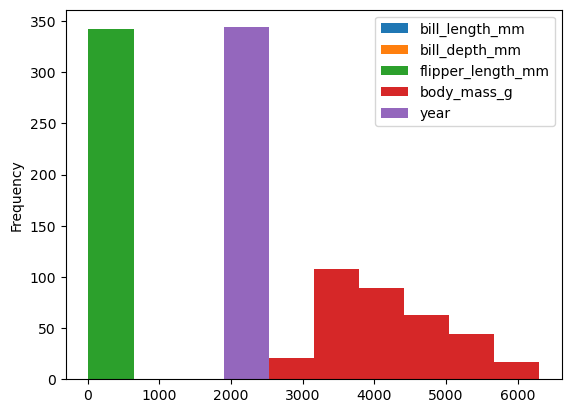

In [54]:
# using plot without subsetting data - a mess again

penguins.plot(kind='hist')

To gain actual information, let’s subset the data before plotting it. For example, suppose we want to look at the distribution of flipper length. We could do it in this way:

<AxesSubplot:title={'center':'Penguin flipper lengths'}, ylabel='Frequency'>

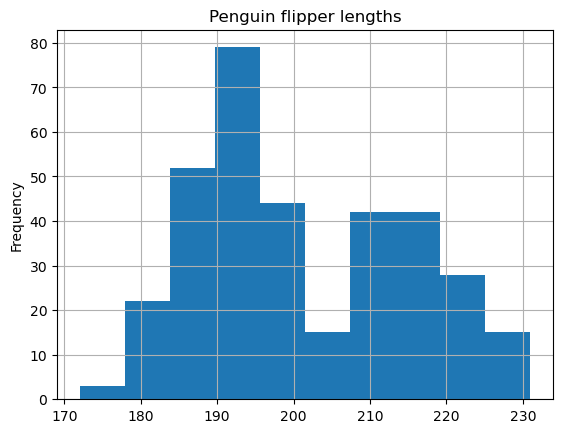

In [68]:
# distribution of flipper length measurements
# first select data, then plot
penguins.flipper_length_mm.plot(kind='hist',
                                title='Penguin flipper lengths',
                                xlabel='Flipper length (mm)',
                                grid=True)

### Check-in:

1. Select the `bill_length_mm` and `bill_depth_mm` columns in the `penguins` dataframe and then update the `kind` parameter to `box` to make boxplots of the bill length and bill depth.

2. Select both rows and columns to create a histogram of the flipper length of gentoo penguins.


bill_length_mm       AxesSubplot(0.125,0.11;0.352273x0.77)
bill_depth_mm     AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

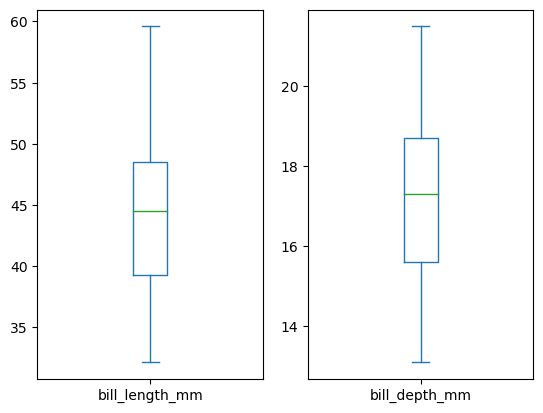

In [78]:
check_subset = penguins[['bill_length_mm', 'bill_depth_mm']]

check_subset.plot(kind='box',
                 subplots = True)

<AxesSubplot:title={'center':'Distribution of Gentoo Flipper Length (mm)'}, ylabel='Frequency'>

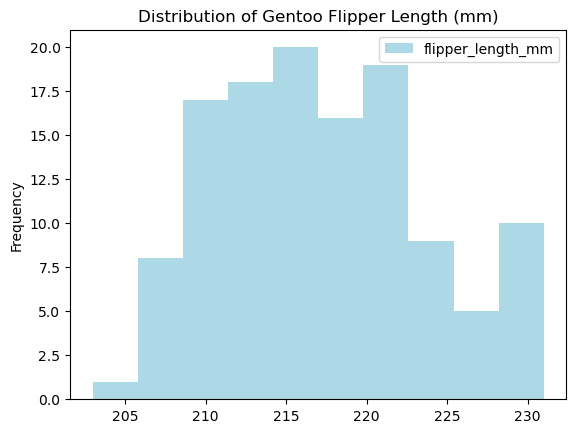

In [75]:
gentoos = penguins[penguins.species == 'Gentoo']

gentoos.flipper_length_mm

gentoos.plot(kind='hist',
             x='species',
             y='flipper_length_mm',
             color='lightblue',
             title='Distribution of Gentoo Flipper Length (mm)')

In [70]:
gentoos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007
153,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male,2007
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007
155,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,male,2007
156,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009
